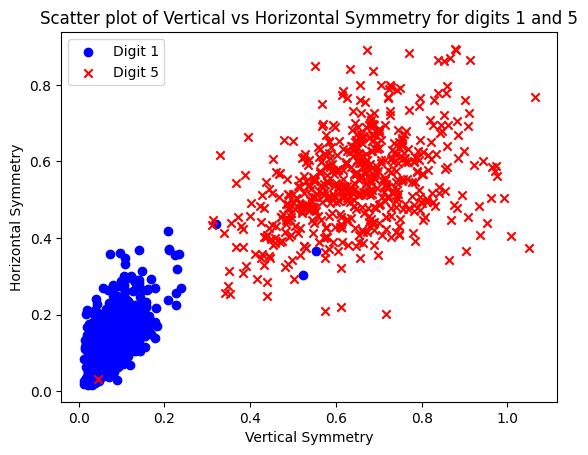

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    input_file = 'clean_ZipDigits.train.txt'
    with open(input_file, 'r') as f:
        lines = f.readlines()

    vertical_sym_1 = []
    horizontal_sym_1 = []
    vertical_sym_5 = []
    horizontal_sym_5 = []

    for line in lines:

        values = list(map(float, line.split()))
        label = values[0]
        values = values[1:] # Remove label (1 or 5)
        assert(len(values) == 256)

        horiz_sym = 0
        vert_sym = 0
        for i in range(16):
            for j in range(8):
                horiz_sym += abs(values[i*16 + j] - values[i*16 + 15-j])
        for i in range(8):
            for j in range(16):
                vert_sym += abs(values[i*16 + j] - values[(15-i)*16 + j])
        horiz_sym = horiz_sym / 128.0
        vert_sym = vert_sym / 128.0

        if label == 1.0:
            vertical_sym_1.append(vert_sym)
            horizontal_sym_1.append(horiz_sym)
        else:
            vertical_sym_5.append(vert_sym)
            horizontal_sym_5.append(horiz_sym)

    plt.scatter(vertical_sym_1, horizontal_sym_1, color='blue', marker='o', label="Digit 1")
    plt.scatter(vertical_sym_5, horizontal_sym_5, color='red', marker='x', label="Digit 5")

    # Adding labels and legend
    plt.xlabel('Vertical Symmetry')
    plt.ylabel('Horizontal Symmetry')
    plt.legend()
    plt.title('Scatter plot of Vertical vs Horizontal Symmetry for digits 1 and 5')
    
    # Show the plot
    plt.show()